In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
from sklearn import neighbors
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler



### Question 1)
Read the given dataset as a dataframe and check for missing values

In [2]:
# solution code
data=pd.read_csv("jewel.csv")
data.isnull()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
53935,False,False,False,False,False,False,False,False,False,False
53936,False,False,False,False,False,False,False,False,False,False
53937,False,False,False,False,False,False,False,False,False,False
53938,False,False,False,False,False,False,False,False,False,False


### Question 2)
Create line plots for 'y', 'z', 'depth', and 'table' attributes versus price separately in order to check for potential outliers.

<Figure size 640x480 with 0 Axes>

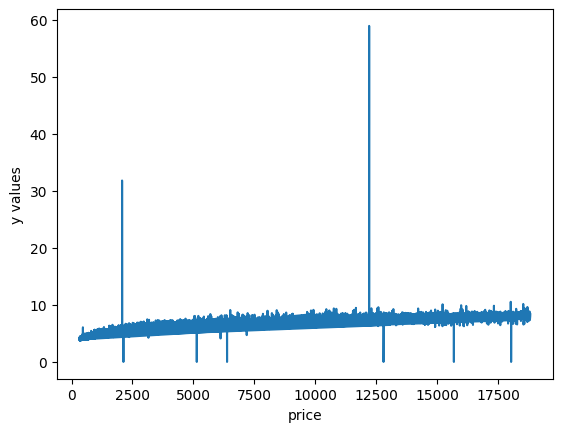

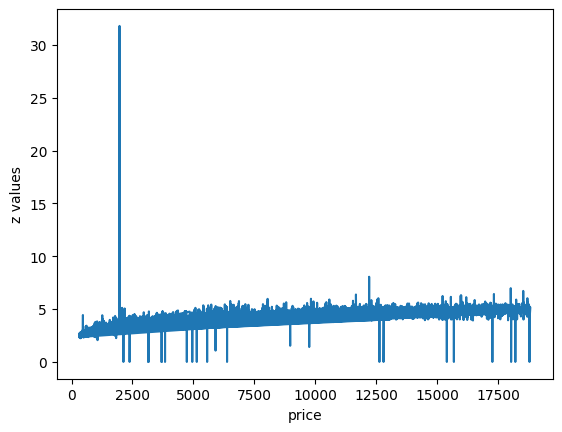

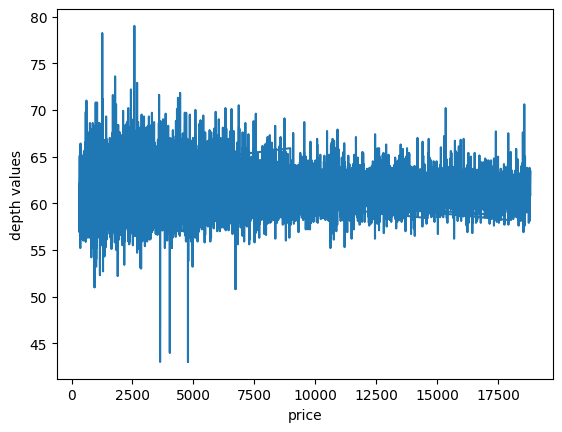

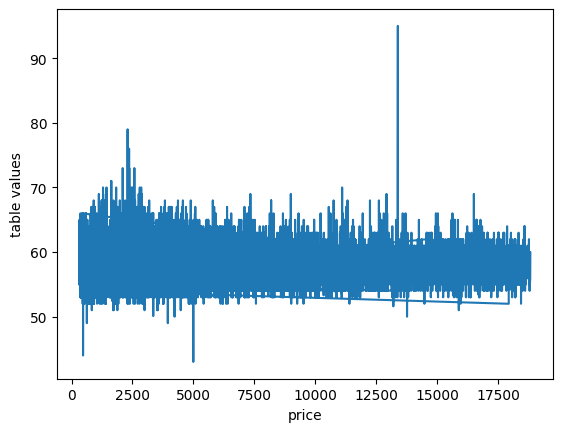

<Figure size 640x480 with 0 Axes>

In [3]:
# solution code
y_values=data["y"]
z_values=data["z"]
depth_values = data["depth"]
table_values = data["table"]
price_values=data [ "price"]



plt.plot(price_values,y_values)
plt.xlabel("price")
plt.ylabel("y values")
plt.figure()

plt.plot(price_values,z_values)
plt.xlabel("price")
plt.ylabel("z values")
plt.figure()

plt.plot(price_values,depth_values)
plt.xlabel("price")
plt.ylabel("depth values")
plt.figure()

plt.plot(price_values,table_values)
plt.xlabel("price")
plt.ylabel("table values")
plt.figure()






### Question 3)

Find and remove outliers by analyzing the above output of question 2. Explain your outlier detection process.

(53940, 10)


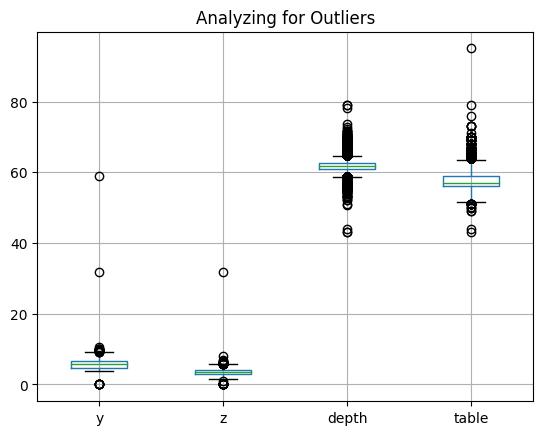

<Figure size 640x480 with 0 Axes>

In [4]:
# solution code
plt.figure()
box_plot_data=["y","z","depth","table"]
plt.title("Analyzing for Outliers")
data.boxplot(box_plot_data)
plt.figure()




print(data.shape)



 #for y values outliers are ones that below the 1 and upper than 10 or 12 
 #for z values there are 2 outliers that bigger than others and its bigger than 20 so i set the max =20
 #for depths there are values around the 80 and there are outliers and  there are few values below the 45 so i set the limits to 45 and 75
 #for  table values  there are some outliers upper then 75 like 5or 6 and there is few outliers too at below the 45 so limits are same with depth values







In [5]:
data.drop( data[ ( data["y"] < 1 ) | (data["y"]> 12 )].index,axis=0,inplace =True)
data.drop ( data[ (data ["z"]> 20) | (data["z"]<2) ].index,axis=0,inplace=True)
data.drop( data [ (data["depth"]> 75)   | (data["depth"]<45 )].index,axis=0,inplace=True)
data.drop(data [ (data["table"]>75)  | (data["table"]<45)].index,axis=0,inplace=True)


<Figure size 640x480 with 0 Axes>

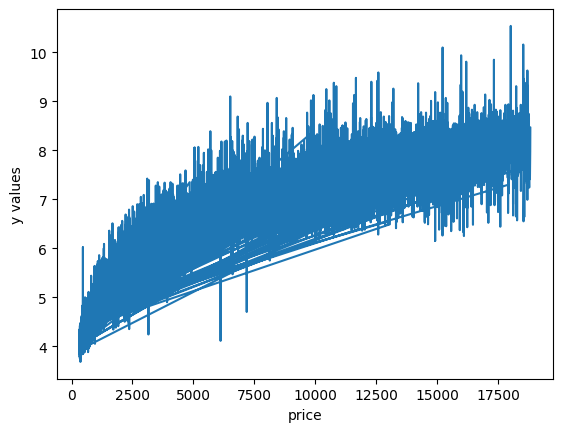

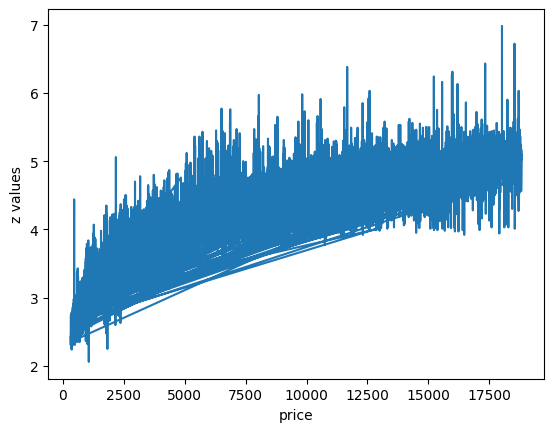

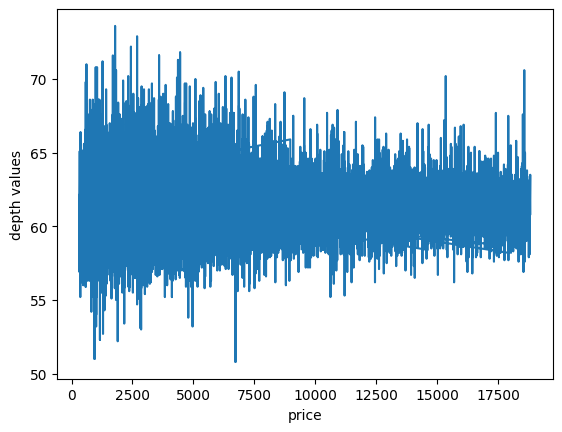

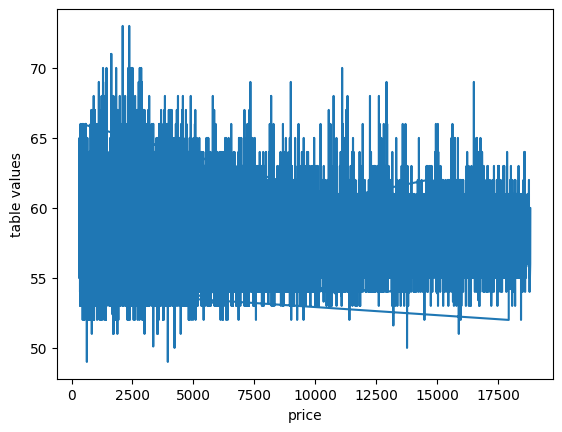

<Figure size 640x480 with 0 Axes>

In [6]:
y_values=data["y"]
z_values=data["z"]
depth_values = data["depth"]
table_values = data["table"]
price_values=data [ "price"]


plt.plot(price_values,y_values)
plt.xlabel("price")
plt.ylabel("y values")
plt.figure()

plt.plot(price_values,z_values)
plt.xlabel("price")
plt.ylabel("z values")
plt.figure()

plt.plot(price_values,depth_values)
plt.xlabel("price")
plt.ylabel("depth values")
plt.figure()

plt.plot(price_values,table_values)
plt.xlabel("price")
plt.ylabel("table values")
plt.figure()







### Question 4)
Replace ordinal values (cut, color, clarity) according to rules below:
- For "cut": 'Good':1, 'Very Good':2, 'Fair':3, 'Ideal':4, 'Premium':5
- For "color": 'J':1, 'I':2, 'H':3, 'G':4, 'F':5, 'E':6, 'D':7
- For "clarity": 'I1':1, 'SI1':2, 'SI2':3, 'VS1':4, 'VS2':5, 'VVS1':6, 'VVS2':7, 'IF':8

In [7]:
# solution code
data["cut"].replace(["Good","Very Good","Fair","Ideal","Premium"],[1,2,3,4,5],inplace=True)

data["color"].replace(["J","I","H","G","F","E","D"],[1,2,3,4,5,6,7],inplace=True)

data["clarity"].replace(["I1","SI1","SI2","VS1","VS2","VVS1","VVS2","IF"],[1,2,3,4,5,6,7,8],inplace=True)
data

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,4,6,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,5,6,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,6,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,5,2,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,1,3,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,4,7,2,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,1,7,2,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,2,7,2,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,5,3,3,61.0,58.0,2757,6.15,6.12,3.74


### Question 5)
Create bar graphs for 'cut', 'color', and 'clarity' attributes with their new values to analyze the dataset visually.


<AxesSubplot: xlabel='clarity'>

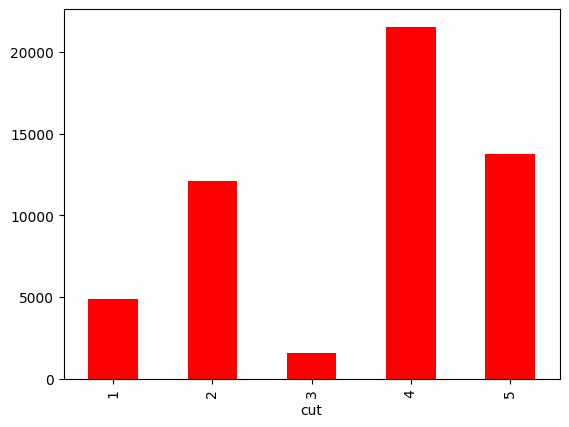

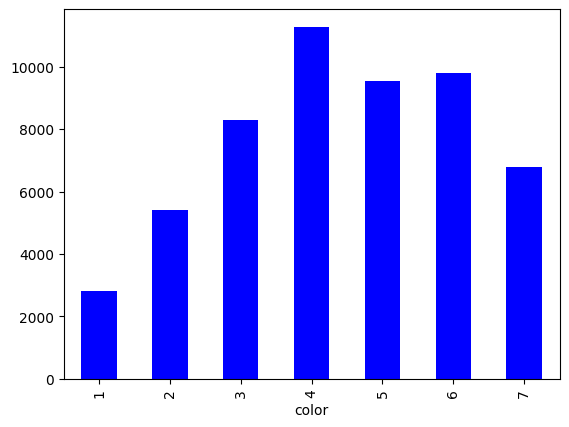

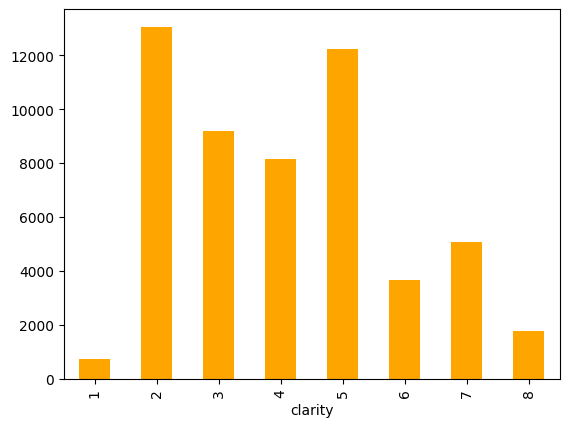

In [9]:
pivotTable= data.pivot_table(data,index='cut',aggfunc='count')

a='red'
pivotTable["x"].plot(kind="bar",color=a)
plt.figure()

pivotTable2= data.pivot_table(data,index='color',aggfunc='count')

b='blue'
pivotTable2["x"].plot(kind="bar",color=b)
plt.figure()

pivotTable3= data.pivot_table(data,index='clarity',aggfunc='count')

c='orange'
pivotTable3["x"].plot(kind="bar",color=c)




### Question 6)
Shuffle the data points and split the dataset into training and testing set, with a 0.7-0.3 ratio (training set will be %70, and test set will be %30 of the dataset) (Write your own shuffling and spliting code here, do not use predefined function train_test_split).



In [10]:
# solution code

df = data.iloc[np.random.permutation(len(data))]

train_size= int(0.7 * len(data))

train_set= df[:train_size]


train_set_y=train_set["price"]

train_set_x =train_set.drop(["price"],axis=1)

test_set=df[train_size:]

test_set_y=test_set["price"]

test_set_x=test_set.drop(["price"],axis=1)



print(train_set_x.shape)
print(train_set_y.shape[0])



print(test_set_x.shape)
print(test_set_y.shape[0])

(37732, 9)
37732
(16171, 9)
16171


### Question 7)

Create an instance of kNN with a number of neighbors between 1-30, then fit kNN regression model to train data. Then, make prediction and calculate mean squared error (MSE). Calculate MSE for k value between 1-30 and print them. Finally, create elbow function to find best k value and plot the elbow curve. Explain how you find the best k-value.

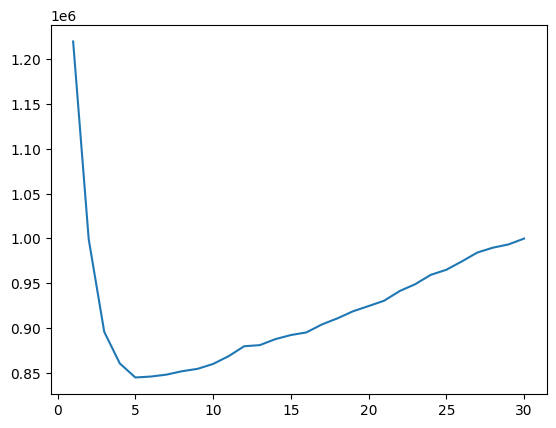

In [11]:
# solution code
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

import warnings
warnings.simplefilter(action='ignore')


####
#BEST K VALUE IS GOING TO BE THE VALUE THAT MAKES THE ERROR MINIMUM
#####


error=[]

for k in range(1,31):

    knn= KNeighborsRegressor(n_neighbors=k)
    
    knn.fit(train_set_x,train_set_y)

    predict= knn.predict(test_set_x)
    
    mse=mean_squared_error(y_true=test_set_y, y_pred = predict)

    error.append(mse)
    
    predict=knn.predict(test_set_x)
k=error.index(min(error))+1


plt.plot(range(1,31),error)


### Question 8)

Run 10-Fold Cross validation (CV) and print accuracy values for each run of CV. Also print the final average accuracy of the model.

In [12]:
# solution code

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression


X = np.array(df.drop(["price"],1))
y = np.array(df["price"])

knn=neighbors.KNeighborsRegressor(n_neighbors=k)
print(k)

accuracies = cross_val_score(knn, X, y, cv=10)

for i in accuracies:
    print(i)

avg_accuracy = np.mean(accuracies)

# Print the average accuracy
print("Average accuracy: {:.4f}".format(avg_accuracy))

5
0.9488232196160852
0.9479970059176042
0.9564400294721049
0.9522094098244994
0.9489539814571204
0.9508414749501094
0.9545127477929248
0.9529193035874647
0.9485294114075689
0.9492646489842714
Average accuracy: 0.9510


### Question 9)

Predict the price of new jewel data with the following custom features. 

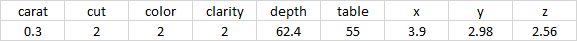

In [13]:
features_array = [[0.3,2,2,2,62.4,55,3.9,2.98,2.56]]
a=np.array(features_array)


a.reshape(1,-1)

knn=neighbors.KNeighborsRegressor(k)
knn.fit(train_set_x,train_set_y)

knn.predict(features_array)



knn.predict(a)

array([463.6])